#### Imports and load data

In [27]:
from google.cloud import storage
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from pydub import AudioSegment

In [28]:
storage_client = storage.Client()
bucket = storage_client.bucket('soundboard_data_sampleswap')

In [29]:
piano_blobs = bucket.list_blobs(prefix="INSTRUMENTS (SINGLE SAMPLES)/Piano and Epiano/", delimiter='/')
synth_blobs = bucket.list_blobs(prefix="INSTRUMENTS (SINGLE SAMPLES)/Synth/", delimiter='/')
pads_blobs = bucket.list_blobs(prefix="INSTRUMENTS (SINGLE SAMPLES)/Pads/", delimiter='/')

#### Save audio to local file, view spectrogram

In [30]:
for blob in piano_blobs:
    if '.' in blob.name:
        print(blob.name)


In [26]:
start_time_0

0

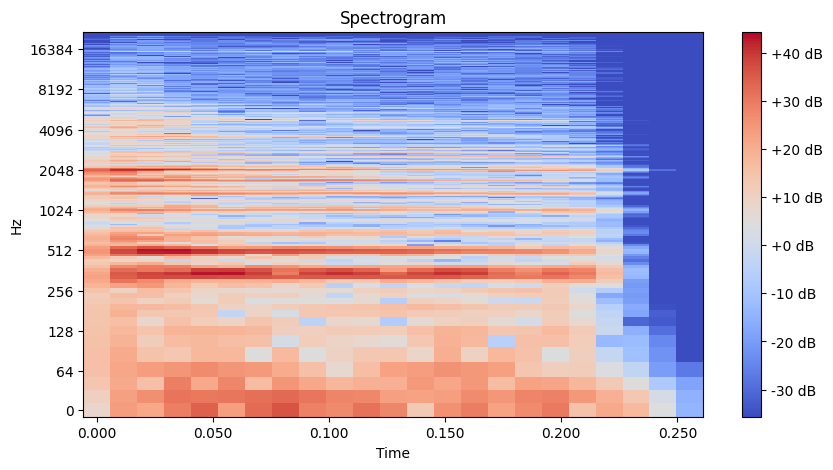

In [5]:
# Load the audio file
audio_file_path = '../data/SAMPLESWAP/INSTRUMENTS (SINGLE SAMPLES)/Piano and Epiano/bluespianopunch.wav'
y, sr = librosa.load(audio_file_path, sr=44100)

# Extract the spectrogram
spectrogram = librosa.stft(y)
spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram))

# Visualize the spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


#### Save Sample Swap instruments into target classes 

In [28]:
keys = ['/Piano and Epiano', '/Synth', '/Organs']
strings = ['/Guitars','/Far East Drones and Plucks','/Vermilion Guitar Noizes']

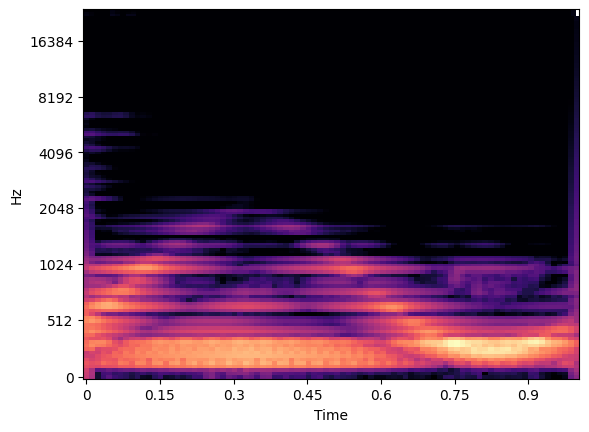

In [12]:
# Set the paths to the input and output folders
input_folder = '../data/SAMPLESWAP/INSTRUMENTS (SINGLE SAMPLES)/Piano and Epiano'
output_folder = '../data/spec_images_instruments/keys'

# Set the desired length of the clip (1 seconds)
clip_length = 1

# Loop through all the audio files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.wav'):
        # Load the audio file
        filepath = os.path.join(input_folder, filename)
        y, sr = librosa.load(filepath, sr=None)
        
        # Calculate the onset detection function
        onset_env = librosa.onset.onset_strength(y=y, sr=sr)

        # Find the onset time of the sound event
        onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr)
        onset_time = librosa.frames_to_time(onset_frames[0], sr=sr)

        # Extract the audio segment starting at the onset time
        clip_start = int(onset_time * sr)
        clip_end = clip_start + int(clip_length * sr)
        clip = y[clip_start:clip_end]

        # Calculate the spectrogram of the clip
        spectrogram = librosa.feature.melspectrogram(y=clip, sr=sr, n_fft=2048, hop_length=512)

        # Convert the spectrogram to decibels
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

        # Save the spectrogram as an image file
        output_filepath = os.path.join(output_folder, filename[:-4] + '.png')
        librosa.display.specshow(spectrogram_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
        plt.savefig(output_filepath)
